In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
iris=datasets.load_iris()
x=iris.data[:,:2]
y=(iris.target!=0)*1

In [5]:
sc=StandardScaler()
x=sc.fit_transform(x)
x[:5]

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112]])

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

In [17]:
class LogisticRegression:
    def __init__(self):
        self.weights=None
    
    def sigmoid(self,z):
        return 1.0/(1.0+np.exp(-z))
    
    def cost(self,h,y):
        return -(y*np.log(h)+(1-y)*np.log(1-y))
    
    def grad(self,x,h,y):
        return np.dot(x.T,(h-y))/y.shape[0]
    
    def fit(self,x,y,nums_iterations=100,learning_rate=0.01):
        self.weights=np.zeros(x.shape[1])
        for i in range(nums_iterations):
            z=np.dot(x,self.weights)
            h=self.sigmoid(z)
            grad=self.grad(x,h,y)
            self.weights=self.weights-grad*learning_rate
    
    def predict(self,x):
        if self.weights is None:
            print("Train maado le")
            return None
        z=np.dot(x,self.weights)
        return (self.sigmoid(z)>0.5)*1

In [18]:
lr=LogisticRegression()
lr.fit(x_train,y_train,learning_rate=0.01,nums_iterations=100)

In [20]:
y_pred=lr.predict(x_test)
np.mean(y_pred==y_test)

0.9666666666666667

Text(0, 0.5, 'Sepal width')

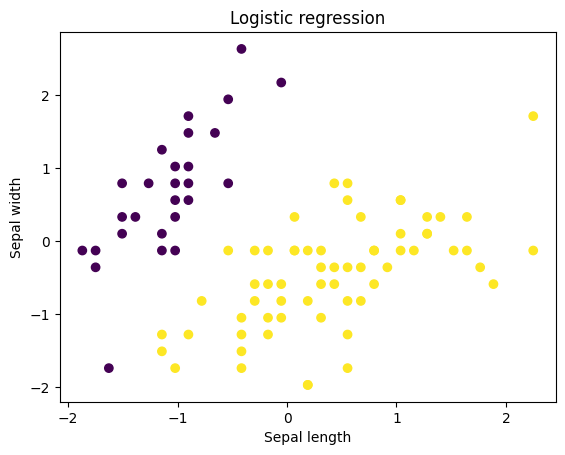

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.title("Logistic regression")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")